In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Длина блока
n = 90
# Длинна предсказания
len_pred = 30

In [3]:
df = pd.read_csv('bit_mex_base_Timestamp1m.csv', sep=';')
print(len(df))
from_ = 8000
df = df[-(from_ + 1440):-from_]
# Дни
# df['date'] = pd.to_datetime(df['timestamp'],unit='s').dt.date
# Часы
#df['date'] = pd.to_datetime(df['timestamp'],unit='s').dt.strftime('%H')
# Минуты
df['date'] = pd.to_datetime(df['timestamp'],unit='s')
group = df.groupby('date')
Real_Price = group['close'].mean()

1353096


In [4]:
df.head()

,timestamp,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,date
1343656,1.563837e+09,10220.5,10220.5,10212.5,10212.5,616,768234,10218.6797,6686.0,7518215262,75.182153,768234,2019-07-22 23:16:00
1343657,1.563837e+09,10212.5,10220.0,10205.0,10217.5,962,4751418,10209.2905,100.0,46540753967,465.407540,4751418,2019-07-22 23:17:00
1343658,1.563837e+09,10217.5,10219.5,10210.5,10211.0,311,559581,10217.6356,1.0,5476864452,54.768645,559581,2019-07-22 23:18:00
1343659,1.563838e+09,10211.0,10211.0,10210.5,10211.0,92,138621,10211.3755,46.0,1357535326,13.575353,138621,2019-07-22 23:19:00
1343660,1.563838e+09,10211.0,10230.5,10210.5,10230.5,712,1893210,10221.8133,1000.0,18521647012,185.216470,1893210,2019-07-22 23:20:00


In [5]:
print (len(Real_Price))

1440


In [6]:
spliter = n + len_pred
train_set = Real_Price[:-spliter].values
test_set = Real_Price[-spliter:].values

In [7]:
scaler = MinMaxScaler(feature_range = (0, 1))

train_set_ = train_set.reshape(-1, 1)
test_set_ = test_set.reshape(-1, 1)

scaler = scaler.fit(train_set_)

train_set_ = scaler.transform(train_set_)
test_set_ = scaler.transform(test_set_)

In [8]:
len(train_set_)

1320

In [9]:
features_set = []
labels = []
for i in range(n, len(train_set_)):
    features_set.append(train_set_[i-n:i, 0])
    labels.append(train_set_[i, 0])
features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [10]:
# MMODEL
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(features_set, labels, epochs = 100, batch_size = None)

Using TensorFlow backend.


Epoch 1/100
1230/1230 [==============================] - 5s 4ms/step - loss: 0.0393
Epoch 2/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0087
Epoch 3/100
1230/1230 [==============================] - 3s 3ms/step - loss: 0.0076
Epoch 4/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0070
Epoch 5/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0066
Epoch 6/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0066
Epoch 7/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0066
Epoch 8/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0061
Epoch 9/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0059
Epoch 10/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0063
Epoch 11/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 12/100
1230/1230 [==============================] - 4s 3ms/step - lo

1230/1230 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 97/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0010
Epoch 98/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 99/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 100/100
1230/1230 [==============================] - 4s 3ms/step - loss: 0.0012


In [11]:
test_features = []
for i in range(n, len(test_set_)):
    test_features.append(test_set_[i-n:i, 0])

In [12]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [13]:
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

In [14]:
# print (predictions)

In [15]:
testion_ = np.array(test_set_[n:])
testion_ = scaler.inverse_transform(testion_)
# print(testion_)

In [16]:
average = 0
for index, i in enumerate(range(len(testion_))):
    real = round(testion_[i][0], 1)
    predict_ = round(predictions[i][0], 1)
    print (f"{real} <-> {round(float(predict_), 1)} | {round((predict_ - real) / predict_ * 100, 2)} %")
    average += abs(predict_ - real) / predict_ * 100
average /= index
print(f"Среднее отклонение {round(average, 2)} %")


9690.0 <-> 9690.6 | 0.01 %
9686.0 <-> 9696.5 | 0.11 %
9690.5 <-> 9700.2 | 0.1 %
9682.0 <-> 9701.9 | 0.21 %
9680.0 <-> 9700.4 | 0.21 %
9680.5 <-> 9696.7 | 0.17 %
9681.0 <-> 9693.1 | 0.12 %
9681.5 <-> 9691.3 | 0.1 %
9682.0 <-> 9691.4 | 0.1 %
9682.0 <-> 9692.6 | 0.11 %
9682.0 <-> 9693.9 | 0.12 %
9671.0 <-> 9694.7 | 0.24 %
9689.5 <-> 9692.2 | 0.03 %
9680.0 <-> 9692.3 | 0.13 %
9675.5 <-> 9693.3 | 0.18 %
9661.0 <-> 9692.5 | 0.32 %
9663.5 <-> 9687.0 | 0.24 %
9664.0 <-> 9680.1 | 0.17 %
9658.0 <-> 9675.5 | 0.18 %
9633.0 <-> 9672.5 | 0.41 %
9647.5 <-> 9665.2 | 0.18 %
9650.0 <-> 9658.7 | 0.09 %
9653.0 <-> 9656.8 | 0.04 %
9652.5 <-> 9659.2 | 0.07 %
9648.5 <-> 9663.1 | 0.15 %
9636.0 <-> 9665.1 | 0.3 %
9636.0 <-> 9661.9 | 0.27 %
9622.0 <-> 9655.8 | 0.35 %
9610.5 <-> 9647.2 | 0.38 %
9632.0 <-> 9636.6 | 0.05 %
Среднее отклонение 0.18 %


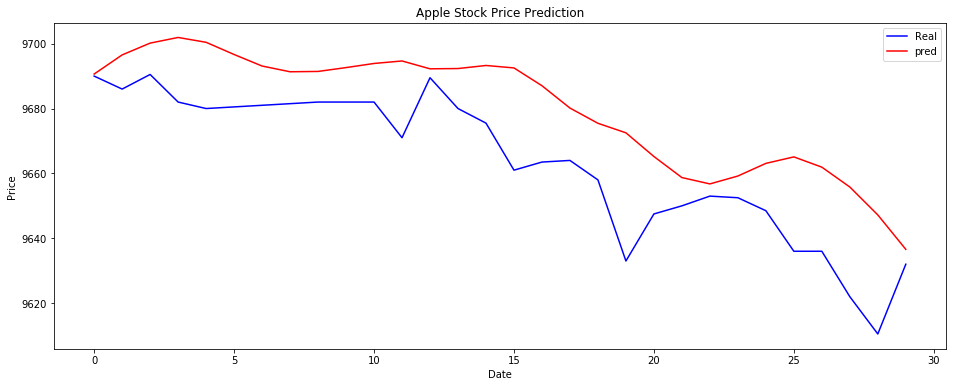

In [17]:
plt.figure(figsize=(16,6))
plt.plot(testion_, color='blue', label='Real')
plt.plot(predictions , color='red', label='pred')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()